#DRE0065 - ZSU PROJECT

##Credit Card Data Dataset


# TASK 1


In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [145]:
data = pd.read_csv('/content/CC GENERAL.csv', na_values=['NULL'])
print(data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [146]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [147]:
print(data.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [148]:
print(data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


### Graf 1: Počet transakcí na zákazníka
- Největší skupinu tvoří zákazníci s 0 transakcemi.
- Hodnota 12 transakcí se vyskytuje častěji, což může ukazovat na specifické chování zákazníků.
- **Hypotéza**: Většina zákazníků nevyužívá kreditní kartu aktivně, což naznačuje, že karta může sloužit jako záložní finanční nástroj.

### Graf 2: Délka využívání kreditní karty
- Většina zákazníků má kreditní kartu 12 let.
- Ostatní délky (6–11 let) jsou zastoupeny minimálně.
- **Hypotéza**: Většina zákazníků zůstává dlouhodobými klienty, což může být indikátorem spokojenosti s nabízenými službami.


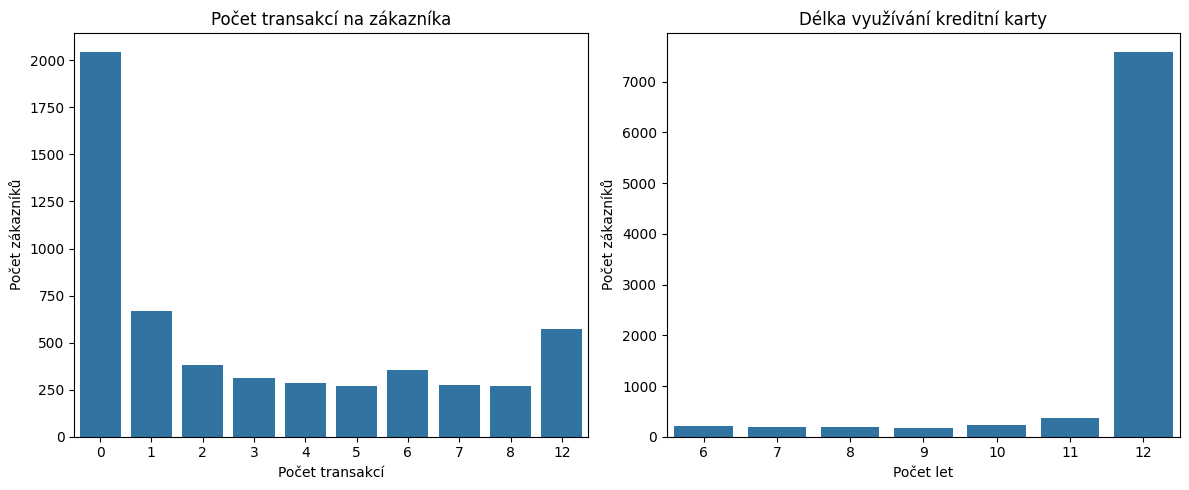

In [149]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
top_values = data['PURCHASES_TRX'].value_counts().head(10).index
filtered_data = data[data['PURCHASES_TRX'].isin(top_values)]

sns.countplot(x=filtered_data['PURCHASES_TRX'])
plt.title('Počet transakcí na zákazníka')
plt.xlabel('Počet transakcí')
plt.ylabel('Počet zákazníků')

plt.subplot(1, 2, 2)
sns.countplot(x=data['TENURE'])
plt.title('Délka využívání kreditní karty')
plt.xlabel('Počet let')
plt.ylabel('Počet zákazníků')

plt.tight_layout()
plt.show()

### Graf 1: Rozložení zůstatků na účtech
- Většina zákazníků má zůstatek nižší než 2 500.
- Výrazný vrchol u hodnoty 0 naznačuje neaktivní účty.
- Jsou přítomné i odlehlé hodnoty nad 15 000.
- **Hypotéza**: Neaktivní účty (se zůstatkem 0) mohou patřit zákazníkům, kteří kreditní kartu přestali používat, ale ponechali si ji pro případ nouze.

### Graf 2: Rozložení kreditních limitů
- Nejvíce zákazníků má kreditní limit v rozmezí 1 000–5 000.
- Nižší počet zákazníků má limit přes 10 000.
- Limit až do 30 000 může indikovat VIP klientelu.
- **Hypotéza**: Vyšší kreditní limity jsou přidělovány zákazníkům s vyššími příjmy nebo dlouhodobou historií spolehlivých plateb.


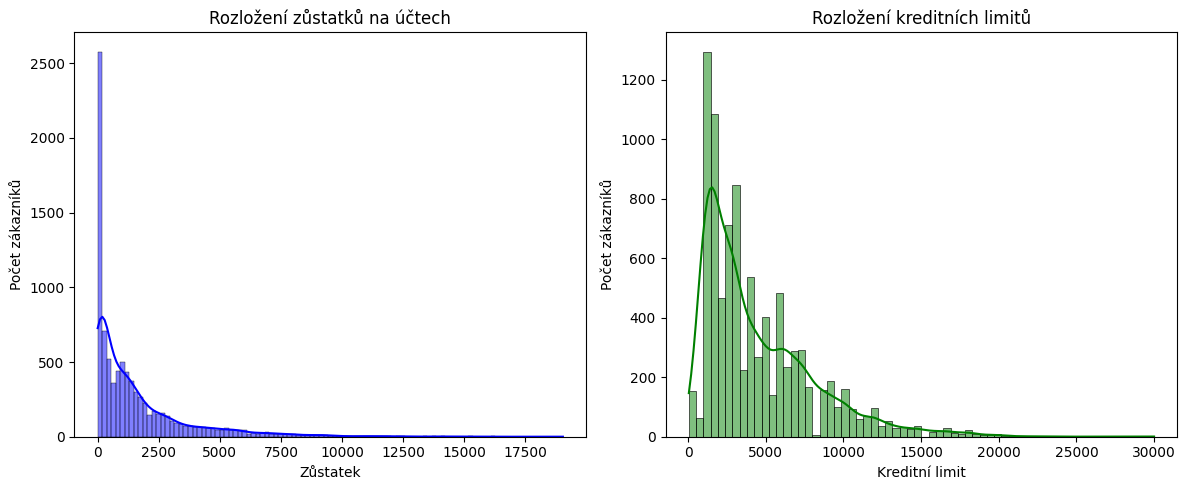

In [150]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['BALANCE'], kde=True, color='blue')
plt.title('Rozložení zůstatků na účtech')
plt.xlabel('Zůstatek')
plt.ylabel('Počet zákazníků')

plt.subplot(1, 2, 2)
sns.histplot(data['CREDIT_LIMIT'], kde=True, color='green')
plt.title('Rozložení kreditních limitů')
plt.xlabel('Kreditní limit')
plt.ylabel('Počet zákazníků')

plt.tight_layout()
plt.show()

### Graf 1: Zůstatek vs. Kreditní limit
- **Popis:** Tento scatterplot ukazuje vztah mezi zůstatkem na účtu a kreditním limitem zákazníka.
- **Zjištění:**
  - Zákazníci s vyšším kreditním limitem mají obecně vyšší zůstatky.
  - Většina bodů je soustředěna u nižších hodnot, což naznačuje, že většina zákazníků má nižší limity a zůstatky.
- **Hypotéza:** Vyšší kreditní limity jsou přidělovány zákazníkům s vyššími zůstatky na účtu, což může být indikátorem jejich finanční stability.

### Graf 2: Hotovostní záloha vs. Platby
- **Popis:** Tento scatterplot zkoumá vztah mezi hotovostními zálohami a platbami provedenými zákazníky.
- **Zjištění:**
  - U většiny zákazníků jsou zálohy a platby relativně nízké.
  - Několik odlehlých hodnot naznačuje zákazníky s velmi vysokými zálohami nebo platbami.
- **Hypotéza:** Zákazníci, kteří provádějí vysoké platby nebo čerpají velké zálohy, mohou mít odlišné finanční potřeby nebo preferují využívání těchto služeb častěji.


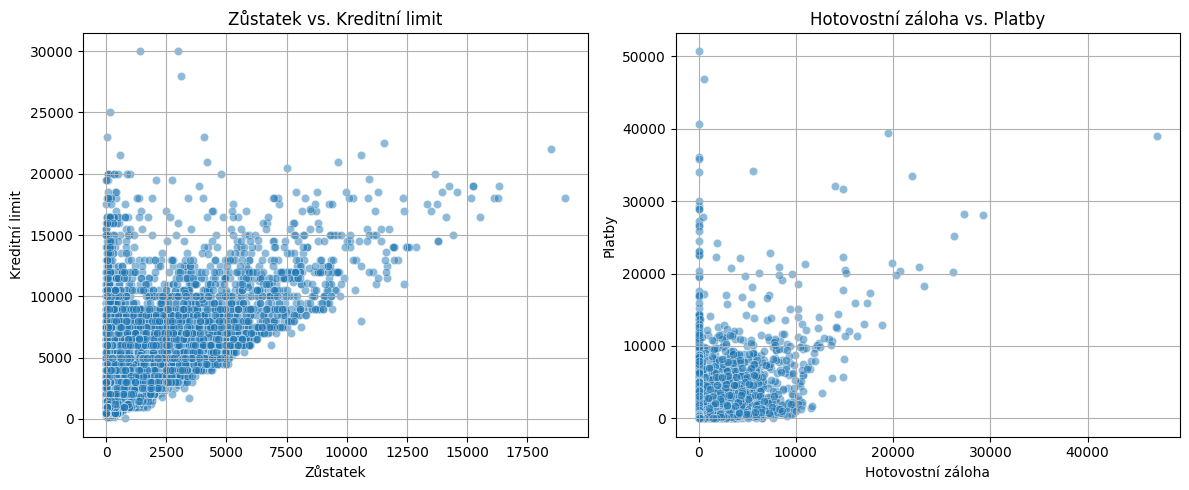

In [151]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data['BALANCE'], y=data['CREDIT_LIMIT'], alpha=0.5)
plt.title('Zůstatek vs. Kreditní limit')
plt.xlabel('Zůstatek')
plt.ylabel('Kreditní limit')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x=data['CASH_ADVANCE'], y=data['PAYMENTS'], alpha=0.5)
plt.title('Hotovostní záloha vs. Platby')
plt.xlabel('Hotovostní záloha')
plt.ylabel('Platby')
plt.grid(True)

plt.tight_layout()
plt.show()

### Graf 1: Boxplot počtu transakcí
- **Popis:** Tento boxplot ukazuje rozložení počtu transakcí mezi zákazníky a identifikuje odlehlé hodnoty.
- **Zjištění:**
  - Většina zákazníků provádí velmi málo transakcí (do 10).
  - Existuje mnoho odlehlých hodnot u zákazníků, kteří provádějí více než 50 transakcí, přičemž maximální hodnota přesahuje 350 transakcí.
- **Hypotéza:** Zákazníci s vyšším počtem transakcí mohou patřit mezi aktivnější uživatele kreditních karet, což může být spojeno s jejich potřebou nebo finančními zvyklostmi.

### Graf 2: Boxplot procenta plné platby
- **Popis:** Tento boxplot zobrazuje, jaké procento zákazníků platí plnou částku svého zůstatku.
- **Zjištění:**
  - Většina zákazníků platí méně než 20 % svého zůstatku jako plnou platbu.
  - Existují odlehlé hodnoty, kde zákazníci platí až 100 % zůstatku, což může indikovat odlišné finanční chování.
- **Hypotéza:** Zákazníci, kteří pravidelně platí plnou částku svého zůstatku, mohou být finančně zodpovědnější nebo preferovat vyhýbání se úrokovým poplatkům.


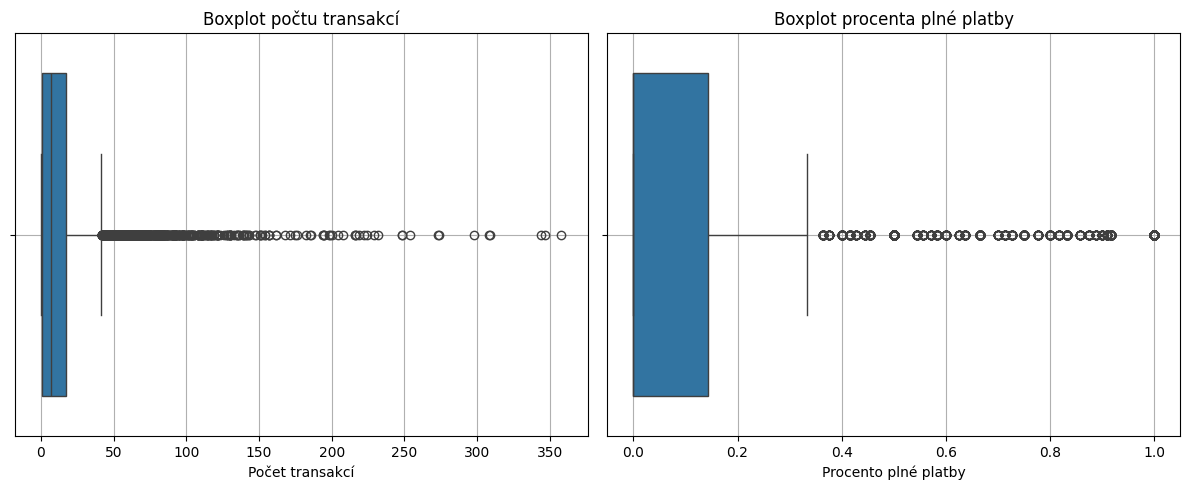

In [152]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['PURCHASES_TRX'])
plt.title('Boxplot počtu transakcí')
plt.xlabel('Počet transakcí')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x=data['PRC_FULL_PAYMENT'])
plt.title('Boxplot procenta plné platby')
plt.xlabel('Procento plné platby')
plt.grid(True)

plt.tight_layout()
plt.show()

### Korelační heatmapa

- **Popis:** Korelační heatmapa zobrazuje vztahy mezi numerickými proměnnými v datasetu.
- **Zjištění:**
  - Silná pozitivní korelace mezi `ONEOFF_PURCHASES` a `PURCHASES` naznačuje, že jednorázové nákupy přispívají k vyšším celkovým nákupům.
  - Střední korelace mezi `BALANCE` a `CREDIT_LIMIT` potvrzuje, že vyšší limity mají často vyšší zůstatky.
  - `CASH_ADVANCE` má nízkou korelaci s ostatními atributy, což poukazuje na nezávislé chování v rámci záloh.

#### Hypotéza

Zákazníci s vyššími kreditními limity častěji provádějí jednorázové nákupy.

#### Zajímavost

Atribut `TENURE` nemá významnou korelaci s ostatními, což ukazuje na konzistenci chování zákazníků bez ohledu na délku vztahu s bankou.


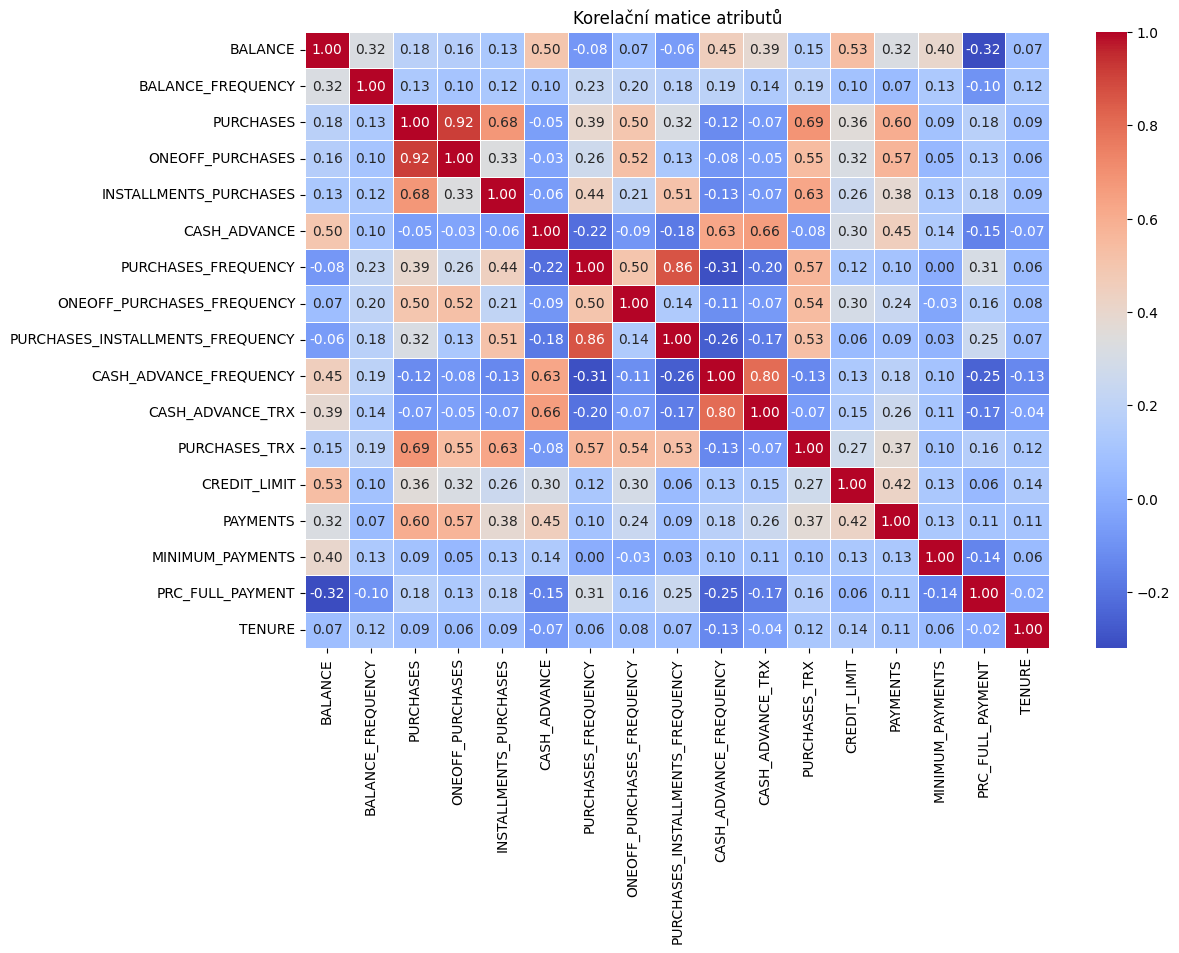

In [153]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelační matice atributů')
plt.show()

### Závěr
- Většina zákazníků má nízké zůstatky a kreditní limity.
- Zákazníci s vyššími limity mají tendenci mít vyšší zůstatky na účtech.
- Jednorázové nákupy (ONEOFF_PURCHASES) mají silnou korelaci s celkovými nákupy (PURCHASES), což ukazuje na jejich významnost v rámci platebních návyků.
- Atribut TENURE (doba využívání kreditní karty) nemá významnou korelaci s ostatními proměnnými, což naznačuje konzistenci chování zákazníků bez ohledu na délku jejich vztahu s bankou.


#TASK 2
### Preprocessing Pipeline

Na základě EDA jsem se rozhodl pro následující předzpracování atributů:

1. **Numerické atributy:**
   - BALANCE, CREDIT_LIMIT, PURCHASES: Normalizace pomocí Min-Max scaling (hodnoty převedeny do intervalu 0–1).
   - CASH_ADVANCE: Log transformace pro snížení vlivu extrémních hodnot.

2. **Vyřazené atributy:**
   - CUST_ID: Tento atribut není relevantní pro clustering.

3. **Chybějící hodnoty:**
   - Všechny chybějící hodnoty byly nahrazeny průměrnými hodnotami příslušných atributů.

4. **Experimenty:**
   - Zkusili jsme různé kombinace atributů (s/bez atributu TENURE) a různé normalizační metody (Min-Max vs. Standard Scaling).


In [154]:
selected_features = ['BALANCE', 'CREDIT_LIMIT', 'PURCHASES', 'CASH_ADVANCE']

data_cleaned = data[selected_features].apply(pd.to_numeric, errors='coerce')
data_cleaned = data_cleaned.fillna(data_cleaned.mean())

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_cleaned)
data_normalized[:, 3] = np.log1p(data_normalized[:, 3])

##Part 1

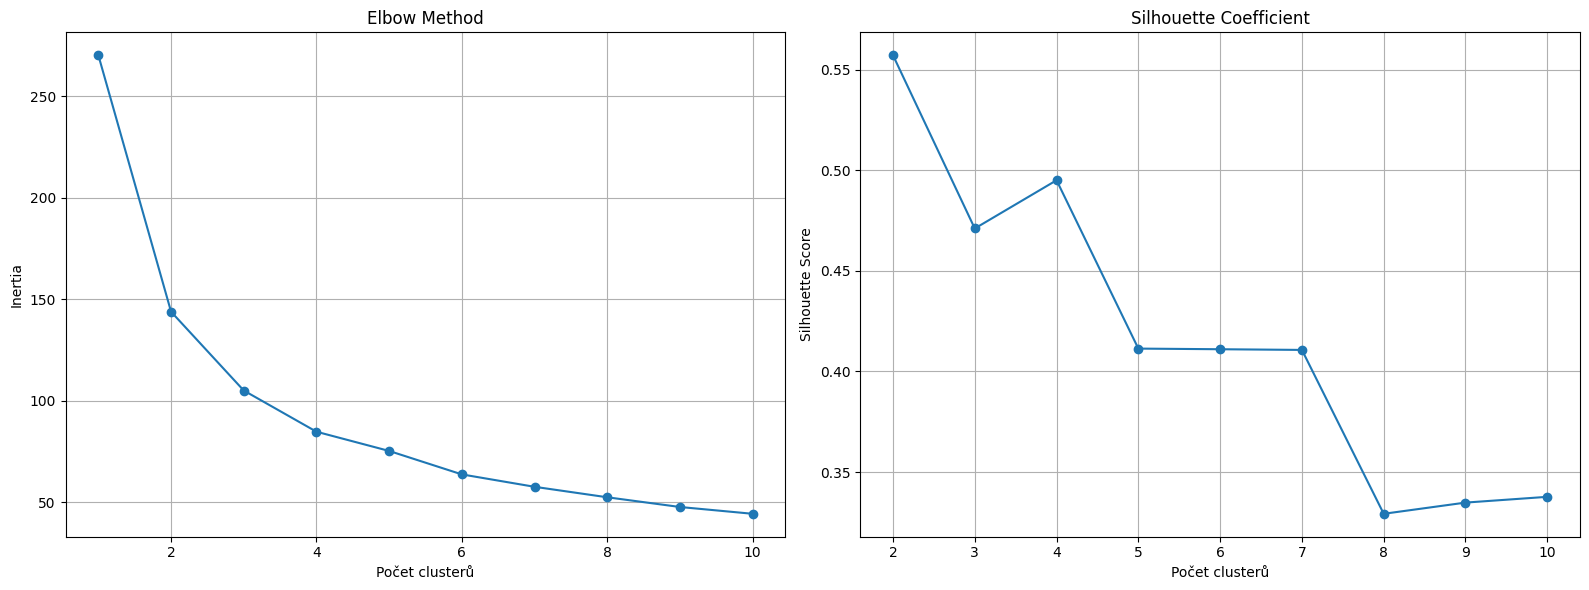

In [155]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    score = silhouette_score(data_normalized, kmeans.labels_)
    silhouette_scores.append(score)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(range(1, 11), inertia, marker='o')
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('Počet clusterů')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

axes[1].plot(range(2, 11), silhouette_scores, marker='o')
axes[1].set_title('Silhouette Coefficient')
axes[1].set_xlabel('Počet clusterů')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [156]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster_ID'] = kmeans.fit_predict(data_normalized)
data['Cluster_ID'] = kmeans.labels_

print(data.sample(10))

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
7794  C18006   223.281483           1.000000    4151.48           3113.59   
3977  C14088   501.453416           1.000000    1199.46            447.00   
8775  C19014    31.050921           1.000000     446.05              0.00   
5833  C15996  2551.808695           1.000000     179.90            179.90   
749   C10776  1646.715644           1.000000    2720.68           2580.19   
8134  C18354   135.843015           0.181818    1111.40           1111.40   
5963  C16129  1275.142146           1.000000     454.72            454.72   
192   C10199    40.417255           0.363636      79.20             79.20   
2782  C12862  2518.248504           1.000000    1086.17           1013.17   
1185  C11229     4.620029           1.000000      59.67              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
7794                 1037.89      0.000000             1.000000   
3977              

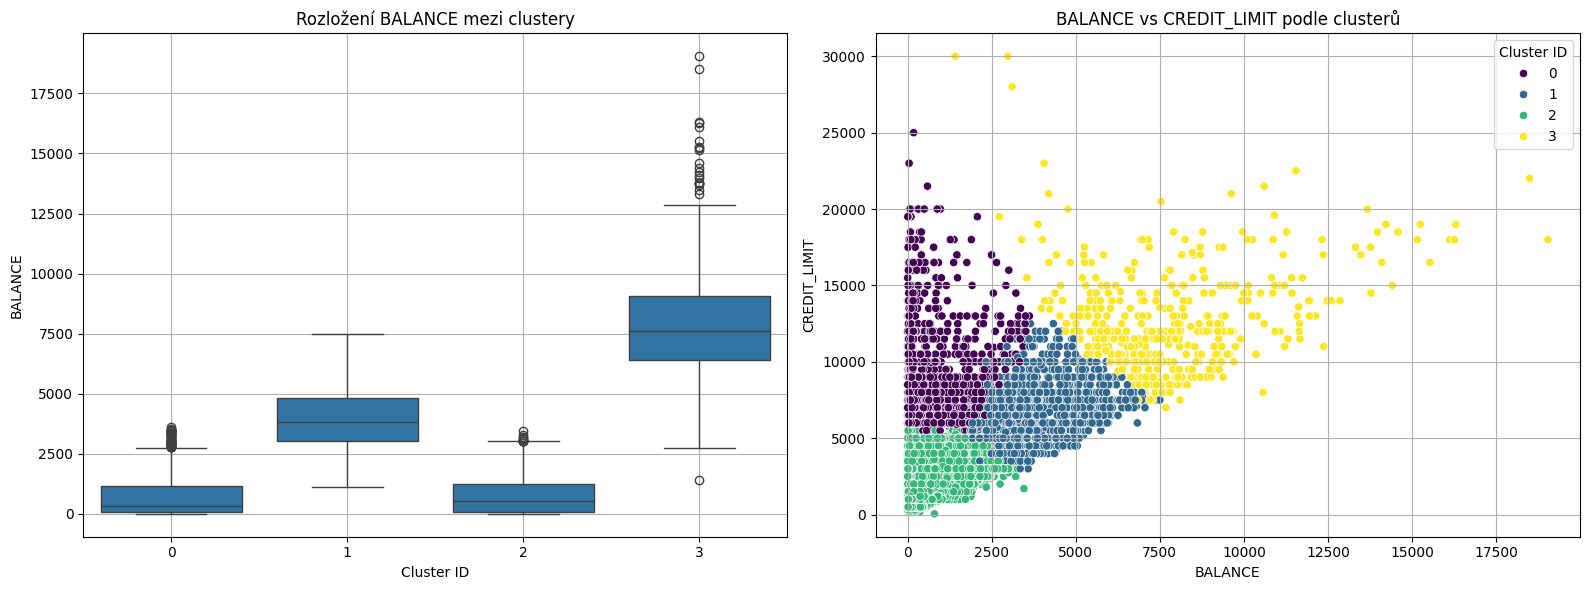

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(ax=axes[0], x=data['Cluster_ID'], y=data['BALANCE'])
axes[0].set_title('Rozložení BALANCE mezi clustery')
axes[0].set_xlabel('Cluster ID')
axes[0].set_ylabel('BALANCE')
axes[0].grid(True)

sns.scatterplot(ax=axes[1], x=data['BALANCE'], y=data['CREDIT_LIMIT'], hue=data['Cluster_ID'], palette='viridis')
axes[1].set_title('BALANCE vs CREDIT_LIMIT podle clusterů')
axes[1].set_xlabel('BALANCE')
axes[1].set_ylabel('CREDIT_LIMIT')
axes[1].legend(title='Cluster ID')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Charakteristika nalezených clusterů:
- **Cluster 0:** Vysoké hodnoty BALANCE.
- **Cluster 1:** Nízké hodnoty všech atributů.
- **Cluster 2:** Střední hodnoty BALANCE a CREDIT_LIMIT.
- **Cluster 3:** Vysoké hodnoty CREDIT_LIMIT, nízké hodnoty BALANCE.


##Part 2
### Určení optimálního počtu clusterů pomocí dendrogramu
- Dendrogram ukazuje hierarchickou strukturu dat.
- Na základě dendrogramu jsme se rozhodli pro **4 clustery** (místo, kde dojde k významnému zvětšení vzdáleností mezi shluky).


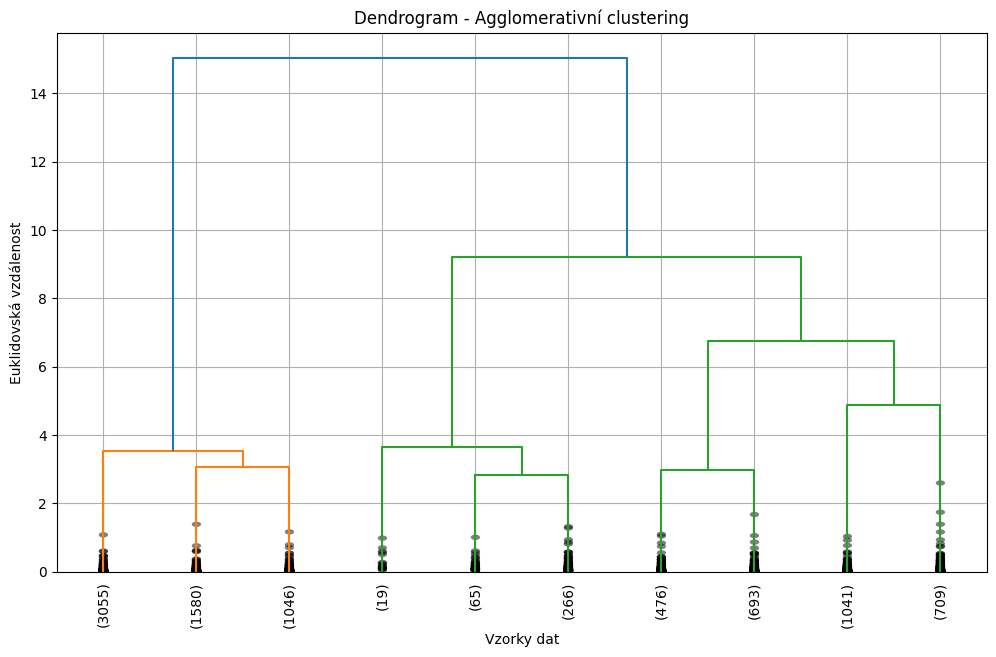

In [158]:
linked = linkage(data_normalized, method='ward')

plt.figure(figsize=(12, 7))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Dendrogram - Agglomerativní clustering')
plt.xlabel('Vzorky dat')
plt.ylabel('Euklidovská vzdálenost')
plt.grid(True)
plt.show()

### Aplikace Agglomerativního Clusteringu
- **Použité parametry:**
  - Počet clusterů: 4
  - Metrika: Euklidovská vzdálenost
  - Metoda: Wardova metoda
- Každému zákazníkovi byl přiřazen `Cluster_ID` na základě jejich atributů.

### Vizualizace výsledků
- **Boxplot:** Rozložení hodnot `BALANCE` mezi jednotlivými clustery.
- **Scatter plot:** Vizualizace vztahu mezi `BALANCE` a `CREDIT_LIMIT` s barevným odlišením jednotlivých clusterů.


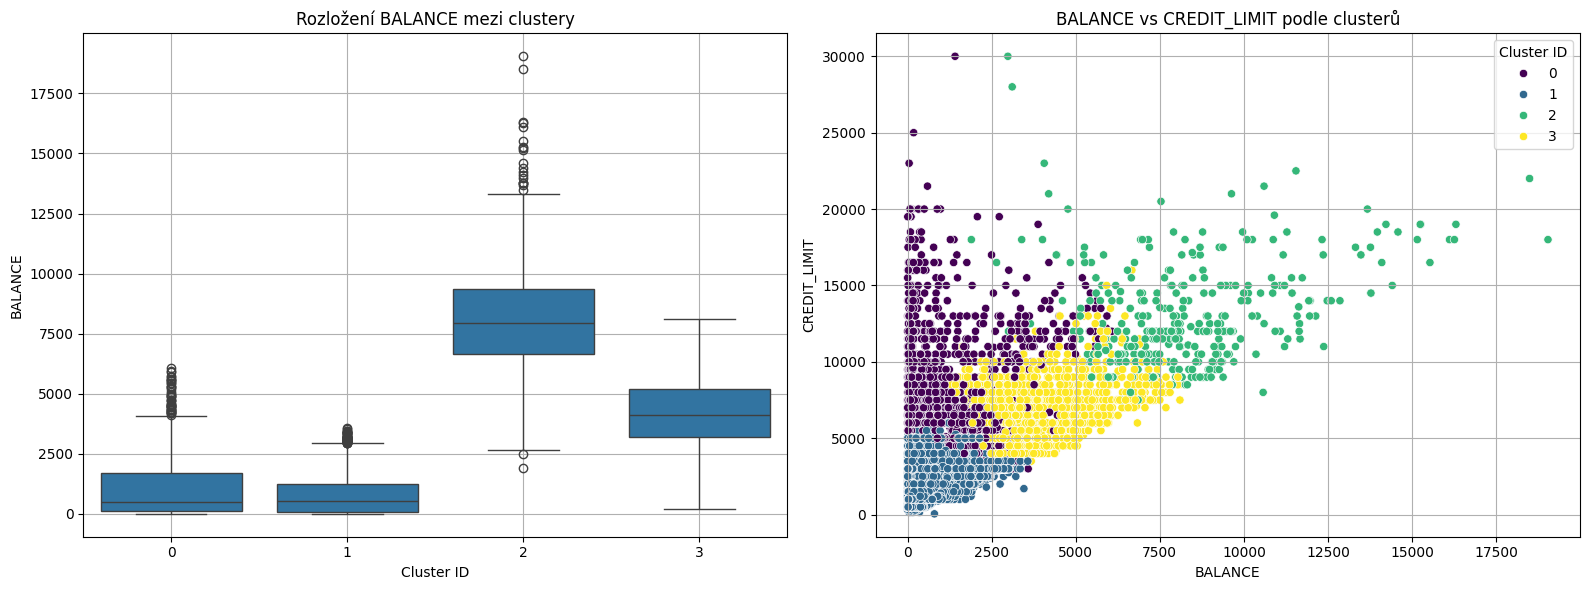

In [160]:
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
data['Cluster_ID'] = agg_clustering.fit_predict(data_normalized)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(ax=axes[0], x=data['Cluster_ID'], y=data['BALANCE'])
axes[0].set_title('Rozložení BALANCE mezi clustery')
axes[0].set_xlabel('Cluster ID')
axes[0].set_ylabel('BALANCE')
axes[0].grid(True)

sns.scatterplot(ax=axes[1], x=data['BALANCE'], y=data['CREDIT_LIMIT'], hue=data['Cluster_ID'], palette='viridis')
axes[1].set_title('BALANCE vs CREDIT_LIMIT podle clusterů')
axes[1].set_xlabel('BALANCE')
axes[1].set_ylabel('CREDIT_LIMIT')
axes[1].legend(title='Cluster ID')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Charakteristika nalezených clusterů
- **Cluster 0:** Vysoké hodnoty BALANCE, nízké hodnoty CREDIT_LIMIT.
- **Cluster 1:** Nízké hodnoty všech atributů.
- **Cluster 2:** Střední hodnoty BALANCE a vysoké hodnoty CREDIT_LIMIT.
- **Cluster 3:** Velmi vysoké hodnoty CREDIT_LIMIT a vysoké hodnoty BALANCE.
